In [69]:
from google.colab import drive  # Import the drive module from google.colab
drive.mount('/content/drive')  # Mount Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd

data=pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/data/raw/creditcard.csv')

In [71]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [72]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [73]:
#NORMALISATION
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the scaler
# scaler = MinMaxScaler()

# # Assuming you have a dataframe 'df' and you want to scale 'Amount' and other features
# data['scaled_amount'] = scaler.fit_transform(data[['Amount']])



In [74]:
#STANDARDISATION
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the 'Amount' column
data['standardized_amount'] = scaler.fit_transform(data[['Amount']])



In [75]:
# Check for missing values and dataset summary
missing_values = data.isnull().sum()
data_summary = data.describe()

missing_values, data_summary


(Time                   0
 V1                     0
 V2                     0
 V3                     0
 V4                     0
 V5                     0
 V6                     0
 V7                     0
 V8                     0
 V9                     0
 V10                    0
 V11                    0
 V12                    0
 V13                    0
 V14                    0
 V15                    0
 V16                    0
 V17                    0
 V18                    0
 V19                    0
 V20                    0
 V21                    0
 V22                    0
 V23                    0
 V24                    0
 V25                    0
 V26                    0
 V27                    0
 V28                    0
 Amount                 0
 Class                  0
 standardized_amount    0
 dtype: int64,
                 Time            V1            V2            V3            V4  \
 count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.84807

<ipython-input-76-e3f64beab060>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette=['green','red'])


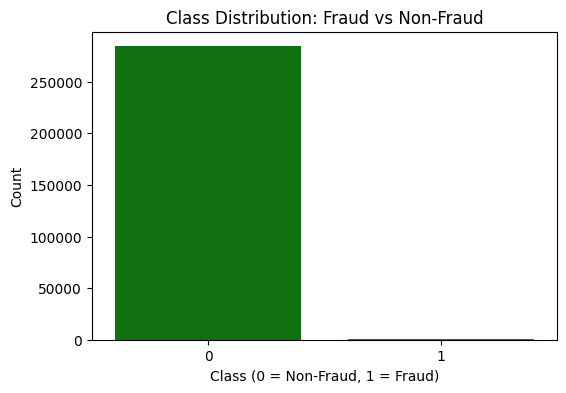

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (Class)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette=['green','red'])
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [77]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [78]:
data['Class'].value_counts(normalize=True) * 100  # Assuming "Class" column labels fraud (1) and non-fraud (0)


,proportion
Class,
0,99.827251
1,0.172749


# The output generated by this code provides a visual comparison of the distribution of the `Amount` feature for non-fraudulent (blue) and fraudulent (red) transactions. Here’s the significance of what you might observe:

1. **Identifying Distribution Differences**:
   - This plot shows whether there are notable differences between the transaction amounts for fraudulent and non-fraudulent transactions.
   - If the distributions for fraud and non-fraud cases are distinct (e.g., fraud cases have higher or lower amounts on average), this could indicate that `Amount` is a useful feature for distinguishing between the two classes.

2. **Assessing Overlap**:
   - If there’s substantial overlap between the two distributions, then the `Amount` feature alone might not be a strong indicator of fraud, as both fraudulent and non-fraudulent transactions share similar values.
   - If the fraud distribution stands out (e.g., higher peaks in specific ranges), this feature could be informative in detecting suspicious transaction sizes.

3. **KDE Line (Kernel Density Estimation)**:
   - The KDE line smooths the distribution, helping to see trends and peaks clearly. Peaks in the KDE line suggest commonly occurring amounts in fraud or non-fraud classes.
   - This can help pinpoint ranges where fraudulent activity is more or less frequent and may guide threshold settings in future fraud detection.

4. **Feature Importance**:
   - Observing a distinct pattern in transaction amounts for fraud can guide your feature engineering. For example, if fraudulent transactions tend to be smaller, you might add engineered features that count or highlight smaller transactions per user.

5. **Modeling Insights**:
   - Understanding these patterns in `Amount` can help refine the model, possibly allowing for more sensitive detection in certain ranges. If `Amount` does not show distinct patterns, you might deprioritize it and focus on other features that reveal more class separation.

Overall, the histogram with KDE provides a quick overview of whether `Amount` has discriminatory power, helping you determine if it’s a significant feature to focus on in the modeling process.

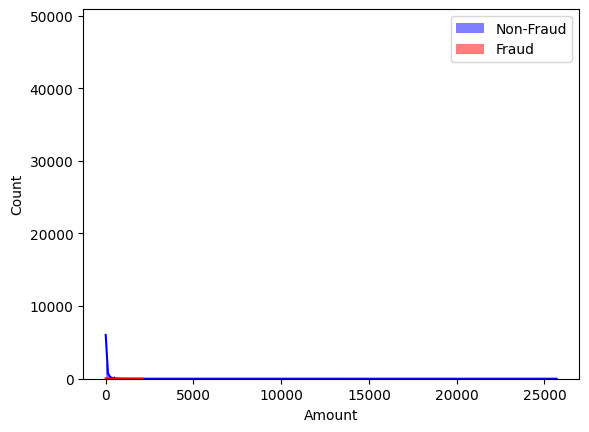

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of features for both classes
sns.histplot(data[data['Class'] == 0]['Amount'], kde=True, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], kde=True, color='red', label='Fraud')
plt.legend()
plt.show()


this heatmap indicates that the features in this dataset are generally independent, with minimal multicollinearity issues. This setup is beneficial for a machine learning model, as it means that each feature might provide distinct information useful for identifying fraud.

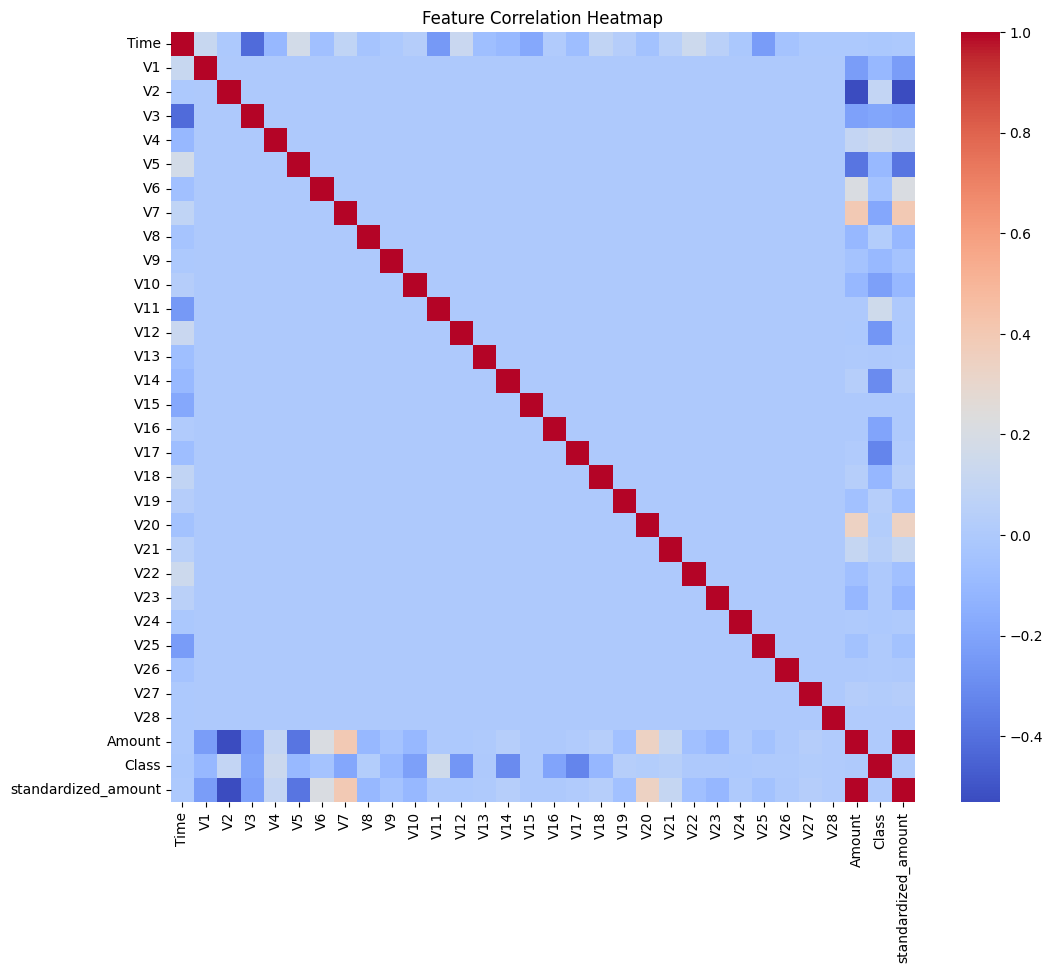

In [80]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


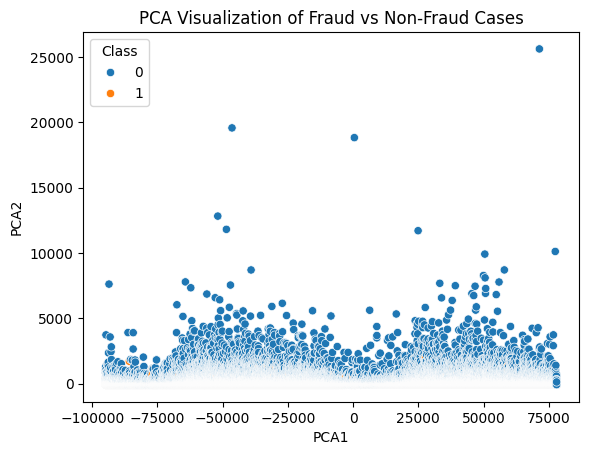

In [81]:
from sklearn.decomposition import PCA

# Drop the target 'Class' column and perform PCA on the features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.drop('Class', axis=1))

# Create a new dataframe for PCA results
data_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
data_pca['Class'] = data['Class']

# Plot PCA result
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=data_pca)
plt.title('PCA Visualization of Fraud vs Non-Fraud Cases')
plt.show()
